In [1]:
import os
print (os.getcwd())
os.chdir("C://Digital Nest/KNN")
print (os.getcwd())

C:\Users\Vishnu Murthy Chakka
C:\Digital Nest\KNN


In [2]:
import numpy as np
import pandas as pd
churn = pd.read_csv('Churn.csv')
churn.describe()

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,DayCalls,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,AreaCode
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [27]:
sum(churn.Churn)

483

In [3]:
churn.columns.values

array(['AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
       'IntlMins', 'CustServCalls', 'Churn', 'IntlPlan', 'VMailPlan',
       'DayCalls', 'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls',
       'NightCharge', 'IntlCalls', 'IntlCharge', 'State', 'AreaCode',
       'Phone'], dtype=object)

In [4]:
# check if any NA values
churn.isnull().values.any()

False

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
churn.State = le.fit_transform(churn.State)
print(churn.State.describe())

count    3333.000000
mean       26.059406
std        14.824911
min         0.000000
25%        14.000000
50%        26.000000
75%        39.000000
max        50.000000
Name: State, dtype: float64


In [6]:
# find out corrleation between day charge and day minutes
np.corrcoef(churn.DayMins,churn.DayCharge)

array([[ 1.        ,  0.99999995],
       [ 0.99999995,  1.        ]])

In [7]:
np.corrcoef(churn.EveMins,churn.EveCharge)

array([[ 1.        ,  0.99999978],
       [ 0.99999978,  1.        ]])

In [8]:
np.corrcoef(churn.NightMins,churn.NightCharge)

array([[ 1.        ,  0.99999921],
       [ 0.99999921,  1.        ]])

In [9]:
np.corrcoef(churn.IntlMins,churn.IntlCharge)

array([[ 1.        ,  0.99999274],
       [ 0.99999274,  1.        ]])

In [10]:
np.corrcoef(churn.DayCalls,churn.DayCharge)

array([[ 1.        ,  0.00675296],
       [ 0.00675296,  1.        ]])

In [5]:
# split the file into Independent and dependent variables
churnY = churn.iloc[::,7:8:1]
print(churnY.describe())
columnsX = [0,1,2,3,4,5,6,8,9,10,12,14,16,18,19]
churnX = churn.iloc[::,columnsX]
print(churnX.describe())

             Churn
count  3333.000000
mean      0.144914
std       0.352067
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
       AccountLength  VMailMessage      DayMins      EveMins    NightMins  \
count    3333.000000   3333.000000  3333.000000  3333.000000  3333.000000   
mean      101.064806      8.099010   179.775098   200.980348   200.872037   
std        39.822106     13.688365    54.467389    50.713844    50.573847   
min         1.000000      0.000000     0.000000     0.000000    23.200000   
25%        74.000000      0.000000   143.700000   166.600000   167.000000   
50%       101.000000      0.000000   179.400000   201.400000   201.200000   
75%       127.000000     20.000000   216.400000   235.300000   235.300000   
max       243.000000     51.000000   350.800000   363.700000   395.000000   

          IntlMins  CustServCalls     IntlPlan    VMailPlan     DayCalls  \
count  3333.000000    3333.000000  3333.000000  3333.000000

In [6]:
# splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(churnX, churnY, test_size = 0.30, random_state = 0)
print(type(X_train))
print(type(Y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [12]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3, weights = 'uniform')
KNN.fit(X_train,Y_train.Churn)
predictY = KNN.predict(X_test)
print(predictY[0:10])

[0 0 0 0 1 0 0 0 0 0]


In [13]:
PProb = KNN.predict_proba(X_test)
print(PProb[0:10])

[[ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.66666667  0.33333333]
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]]


In [8]:
# generate confusion matrix
# import confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(Y_test,predictY))
print (classification_report(Y_test,predictY))

[[822  40]
 [107  31]]
             precision    recall  f1-score   support

          0       0.88      0.95      0.92       862
          1       0.44      0.22      0.30       138

avg / total       0.82      0.85      0.83      1000



In [17]:
Prob1 = KNN.predict_proba(X_test)
print(Prob1)

[[ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 ..., 
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.66666667  0.33333333]]


In [9]:
# generate ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
AUC = roc_auc_score(Y_test, predictY)
print(AUC)
# define variables for True Positive Rate and Falst Positive Rate & threshold value
TPR = dict()
FPR = dict()
THR = dict()
FPR, TPR, THR = roc_curve(Y_test, predictY)

0.589116984431


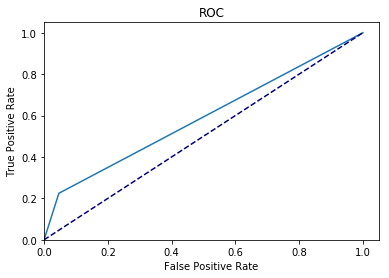

In [10]:
import matplotlib.pyplot as plt
plt.figure()
# plot the FPR as X-axis and TPR as Y-axis
plt.plot(FPR, TPR)
# plot the minimum line 
plt.plot([0,1], [0,1], color='navy', linestyle = '--')
# set X and Y limits
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
# mention lables for X and Y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [14]:
# set the 'distance' as weight
KNN2 = KNeighborsClassifier(n_neighbors=51, weights = 'distance')
KNN2.fit(X_train,Y_train.Churn)
predictY2 = KNN2.predict(X_test)
print (confusion_matrix(Y_test,predictY2))
print (classification_report(Y_test,predictY2))

[[860   2]
 [117  21]]
             precision    recall  f1-score   support

          0       0.88      1.00      0.94       862
          1       0.91      0.15      0.26       138

avg / total       0.88      0.88      0.84      1000



In [15]:
# generate ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
AUC = roc_auc_score(Y_test, predictY2)
print(AUC)
# define variables for True Positive Rate and Falst Positive Rate & threshold value
TPR = dict()
FPR = dict()
THR = dict()
FPR, TPR, THR = roc_curve(Y_test, predictY2)

0.574926863714


In [12]:
# set the neightbours to 4
KNN3 = KNeighborsClassifier(n_neighbors=15, weights = 'distance')
KNN3.fit(X_train,Y_train.Churn)
predictY3 = KNN3.predict(X_test)
print (confusion_matrix(Y_test,predictY3))
print (classification_report(Y_test,predictY3))

[[854   8]
 [110  28]]
             precision    recall  f1-score   support

          0       0.89      0.99      0.94       862
          1       0.78      0.20      0.32       138

avg / total       0.87      0.88      0.85      1000



In [13]:
AUC = roc_auc_score(Y_test, predictY3)
print(AUC)
# define variables for True Positive Rate and Falst Positive Rate & threshold value
TPR = dict()
FPR = dict()
THR = dict()
FPR, TPR, THR = roc_curve(Y_test, predictY3)

0.596808904133
